In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("Pokemon.csv", index_col="#")

In [37]:
df.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#: ID for each pokemon
Name: Name of each pokemon
Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
Type 2: Some pokemon are dual type and have 2
Total: sum of all stats that come after this, a general guide to how strong a pokemon is
HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
Attack: the base modifier for normal attacks (eg. Scratch, Punch)
Defense: the base damage resistance against normal attacks
SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
SP Def: the base damage resistance against special attacks
Speed: determines which pokemon attacks first each round

In [38]:
df.rename(columns={'Sp. Atk': 'Sp_Atk', 'Sp. Def': 'Sp_Def'}, inplace=True)

In [39]:
df.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [40]:
df['Type 2'].fillna('None', inplace=True)

C:\Users\theva\AppData\Local\Temp\ipykernel_12360\1323649386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type 2'].fillna('None', inplace=True)


In [41]:
duplicates = df[df.index.duplicated(keep=False)]
print(duplicates)

                          Name   Type 1  Type 2  Total  HP  Attack  Defense  \
#                                                                             
3                     Venusaur    Grass  Poison    525  80      82       83   
3        VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
6                    Charizard     Fire  Flying    534  78      84       78   
6    CharizardMega Charizard X     Fire  Dragon    634  78     130      111   
6    CharizardMega Charizard Y     Fire  Flying    634  78     104       78   
..                         ...      ...     ...    ...  ..     ...      ...   
711        GourgeistSuper Size    Ghost   Grass    494  85     100      122   
719                    Diancie     Rock   Fairy    600  50     100      150   
719        DiancieMega Diancie     Rock   Fairy    700  50     160      110   
720        HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
720         HoopaHoopa Unbound  Psychic    Dark    6

In [42]:
df['Variant'] = df.groupby(df.index).cumcount()

In [43]:
df['Variant'].head()

#
1    0
2    0
3    0
3    1
4    0
Name: Variant, dtype: int64

In [44]:
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['Name', 'Type 1', 'Type 2', 'Legendary']


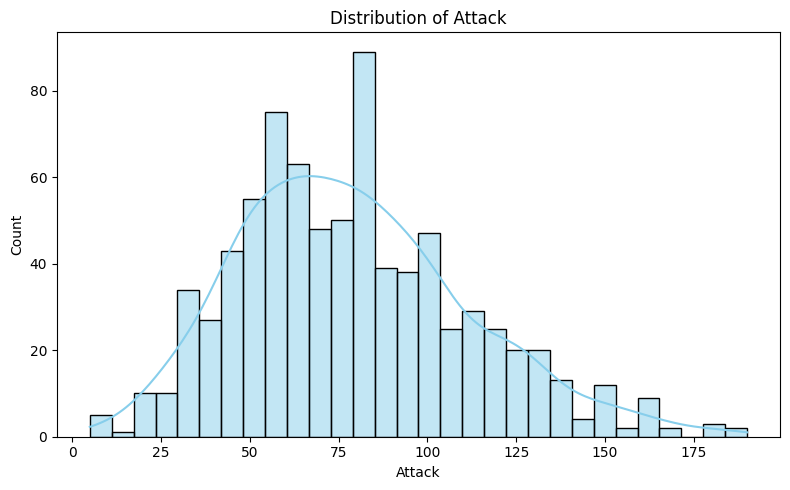

In [ ]:

sns.histplot(df['Attack'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Attack')
plt.xlabel('Attack')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\theva\AppData\Local\Temp\ipykernel_12360\1028604742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Legendary', y='Total', palette='Set2')


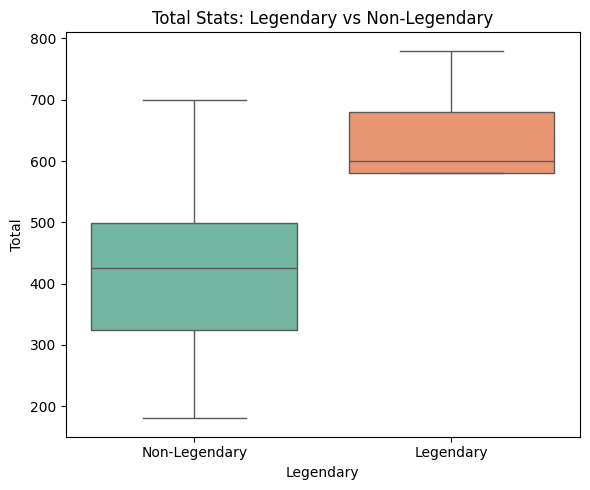

In [ ]:

fig2,ax2 = plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Legendary', y='Total', palette='Set2')
plt.title('Total Stats: Legendary vs Non-Legendary')
plt.xticks([0, 1], ['Non-Legendary', 'Legendary'])
plt.tight_layout()
plt.show()

C:\Users\theva\AppData\Local\Temp\ipykernel_12360\448297108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Type 1', order=df['Type 1'].value_counts().index, palette='viridis')


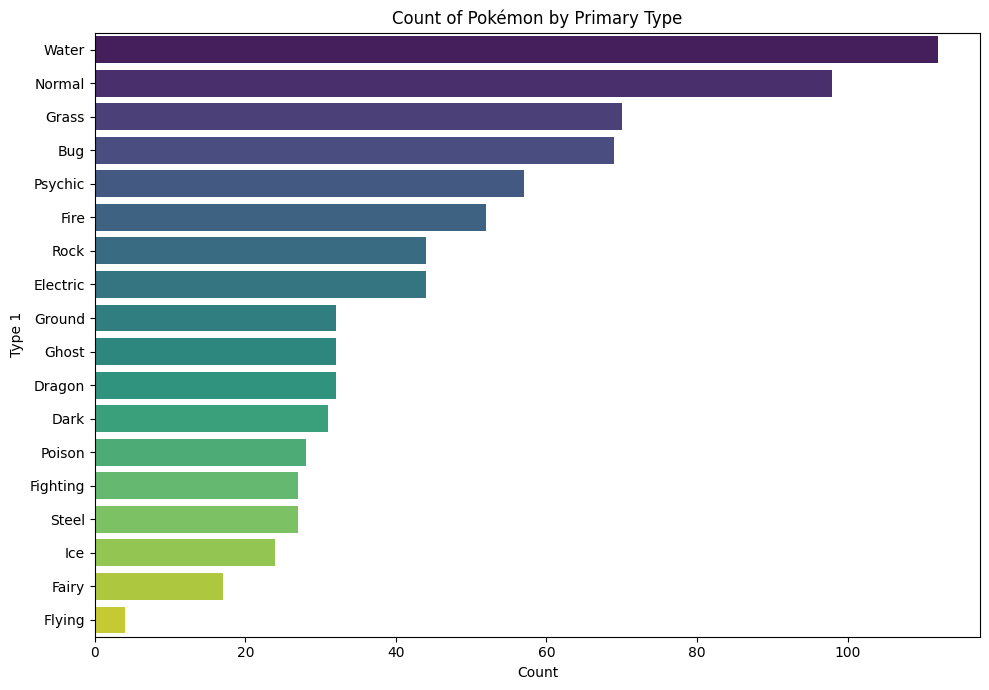

In [ ]:

sns.countplot(data=df, y='Type 1', order=df['Type 1'].value_counts().index, palette='viridis')
plt.title('Count of Pokémon by Primary Type')
plt.xlabel('Count')
plt.ylabel('Type 1')
plt.tight_layout()
plt.show()

In [49]:
top_speed = df.sort_values(by='Speed', ascending=False).head(10)[['Name', 'Speed', 'Legendary']]
top_speed.reset_index(inplace=True)
print("Top 10 Fastest Pokémon:")
print(top_speed)

Top 10 Fastest Pokémon:
     #                       Name  Speed  Legendary
0  386          DeoxysSpeed Forme    180       True
1  291                    Ninjask    160      False
2   65      AlakazamMega Alakazam    150      False
3  386         DeoxysAttack Forme    150       True
4  142  AerodactylMega Aerodactyl    150      False
5  386         DeoxysNormal Forme    150       True
6   15      BeedrillMega Beedrill    145      False
7  617                   Accelgor    145      False
8  254      SceptileMega Sceptile    145      False
9  101                  Electrode    140      False


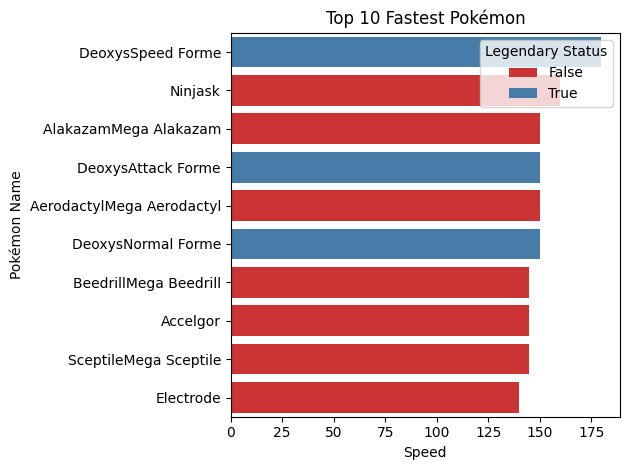

In [ ]:

sns.barplot(data=top_speed, x='Speed', y='Name', hue='Legendary', palette='Set1')
plt.title('Top 10 Fastest Pokémon')
plt.xlabel('Speed') 
plt.ylabel('Pokémon Name')
plt.legend(title='Legendary Status')
plt.tight_layout()
plt.show()

In [50]:
# top 10 strongest pokemon by total stats
strongest = df.sort_values(by='Total', ascending=False).head(10)[['Name', 'Total', 'Legendary']]
strongest.reset_index(inplace=True)
print("Top 10 Strongest Pokémon:")
print(strongest)

Top 10 Strongest Pokémon:
     #                     Name  Total  Legendary
0  384    RayquazaMega Rayquaza    780       True
1  150      MewtwoMega Mewtwo X    780       True
2  150      MewtwoMega Mewtwo Y    780       True
3  382      KyogrePrimal Kyogre    770       True
4  383    GroudonPrimal Groudon    770       True
5  493                   Arceus    720       True
6  380        LatiasMega Latias    700       True
7  445    GarchompMega Garchomp    700      False
8  376  MetagrossMega Metagross    700      False
9  719      DiancieMega Diancie    700       True


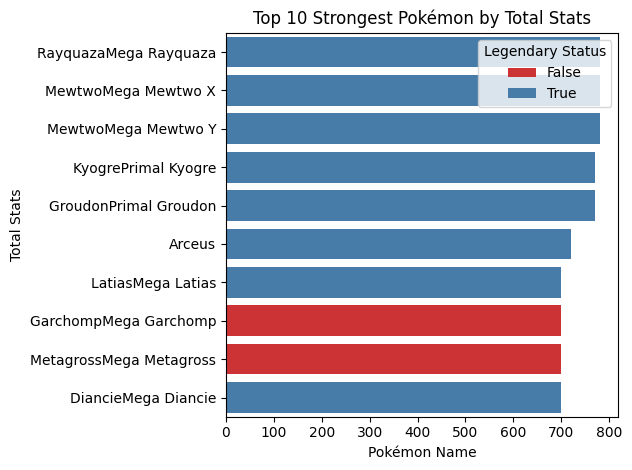

In [ ]:

sns.barplot(data=strongest, x='Total',y='Name', hue='Legendary', palette='Set1')
plt.title('Top 10 Strongest Pokémon by Total Stats')
plt.xlabel('Pokémon Name')
plt.ylabel('Total Stats')
plt.legend(title='Legendary Status')
plt.tight_layout()
plt.show()

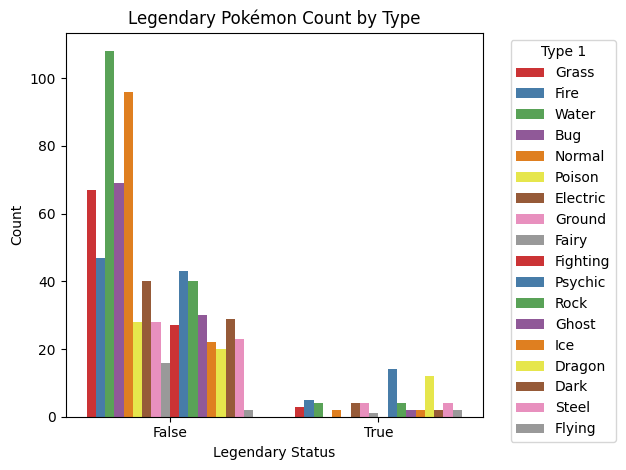

In [ ]:

sns.countplot(data=df, x='Legendary', hue='Type 1', palette='Set1')
plt.title('Legendary Pokémon Count by Type')
plt.xlabel('Legendary Status')
plt.ylabel('Count')
plt.legend(title='Type 1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [56]:
df['total_attack'] = df['Attack'] + df['Sp_Atk']
best_attackers = df.sort_values(by='total_attack', ascending=False).head(10)[['Name', 'total_attack', 'Legendary']]
best_attackers.reset_index(inplace=True)
print("Top 10 Pokémon by Total Attack:")
print(best_attackers)

Top 10 Pokémon by Total Attack:
     #                   Name  total_attack  Legendary
0  384  RayquazaMega Rayquaza           360       True
1  386     DeoxysAttack Forme           360       True
2  150    MewtwoMega Mewtwo X           344       True
3  150    MewtwoMega Mewtwo Y           344       True
4  383  GroudonPrimal Groudon           330       True
5  382    KyogrePrimal Kyogre           330       True
6  720     HoopaHoopa Unbound           330       True
7  719    DiancieMega Diancie           320       True
8  384               Rayquaza           300       True
9  386     DeoxysNormal Forme           300       True


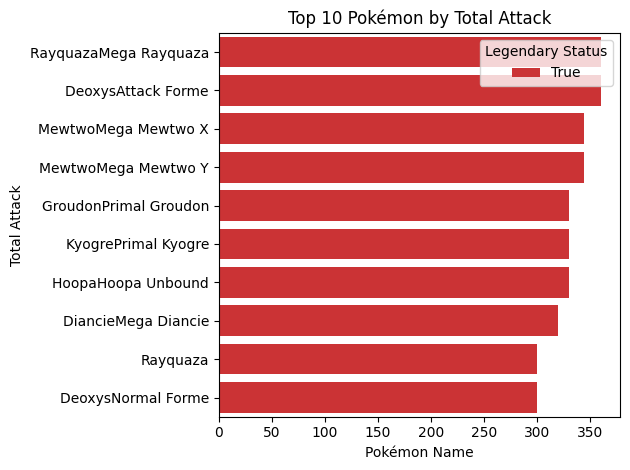

In [ ]:
sns.barplot(data=best_attackers, x='total_attack', y='Name', hue='Legendary', palette='Set1')
plt.title('Top 10 Pokémon by Total Attack')
plt.xlabel('Pokémon Name')
plt.ylabel('Total Attack')
plt.legend(title='Legendary Status')
plt.tight_layout()
plt.show()

In [58]:
df['total_defense'] = df['Defense'] + df['Sp_Def']
best_defenders = df.sort_values(by='total_defense', ascending=False).head(10)[['Name','total_defense','Legendary']]
best_defenders.reset_index(inplace=True)
print("Top 10 Pokémon by Total Defense:")
print(best_defenders)

Top 10 Pokémon by Total Defense:
     #                   Name  total_defense  Legendary
0  213                Shuckle            460      False
1  208    SteelixMega Steelix            325      False
2  386    DeoxysDefense Forme            320       True
3  306      AggronMega Aggron            310      False
4  411              Bastiodon            306      False
5  703                Carbink            300      False
6  719                Diancie            300       True
7  681  AegislashShield Forme            300      False
8  378                 Regice            300       True
9  377               Regirock            300       True


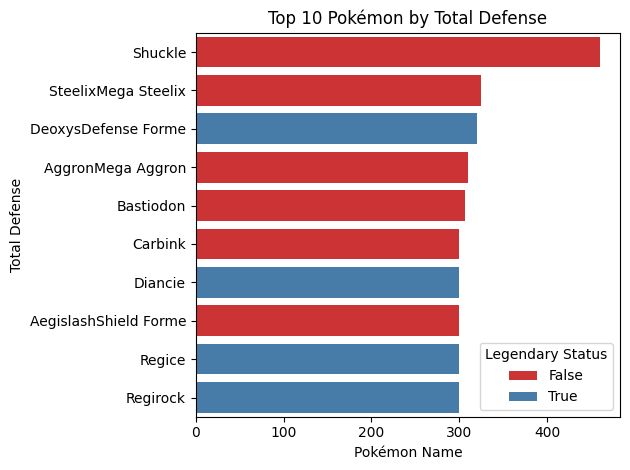

In [ ]:
sns.barplot(data = best_defenders, x='total_defense', y='Name', hue='Legendary', palette='Set1')
plt.title('Top 10 Pokémon by Total Defense')
plt.xlabel('Pokémon Name')
plt.ylabel('Total Defense')
plt.legend(title='Legendary Status')
plt.tight_layout()
plt.show()